<h1>Metodo de Maxima Verossimilhança usando Espectro de Potência</h1>
<h3>Aluno:Matheus Vitor, Astroinformática 2021<h3>

<p>No inicio do universo a matéria bariônica e os fótons estavam acoplados. A matéria buscava a atração devido a força gravitacional e a pressão do fótons exercia uma força contrária</p>
<!-- ![Alt Text](image path "title") -->
<p><img src="http://background.uchicago.edu/~whu/power/baosprings.gif" alt="Alt Text" title="Optional Title"></p>

<p>Quando a matéria e os fótons se desacoplaram esse padrão de interação ficou impresso na matéria barionica e pode ser observado nas estruturas em largas escalas.<p>

<p><img src="http://galaxies-cosmology-2015.wdfiles.com/local--files/baryon-acoustic-oscillations/bao_statistical.png" alt="Alt Text" title="Optional Title"></p>

O espectro de potência $P(k)$ é determinado como a transformada de Fourier da função de correlação da matéria $\xi(r)$. 
$$
\xi(r) =  \langle\,\delta(x),\delta(x')\rangle = \int\dfrac{d^{3}k}{(2\pi)^{3}}P(k)e^{ik.(x-x')}
$$
onde a variação de densidade de matéria é,
$$
\delta(x) =  \dfrac{\rho(x) -\bar{\rho} }{\bar{\rho}}
$$

In [14]:
#importando o modulo classy e nbodykit
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from classy import Class 
from math import pi
from nbodykit.lab import *
from nbodykit import style, setup_logging
from nbodykit.lab import cosmology

Nesse notebook veremos de forma didática como a variação do parâmetro $\Omega_{b}$ e $H_{0}$ afetam o espectro de potência da matéria do universo.

In [15]:
#Verificando o impacto de modificar a densidade crítica de Barions no universo

# Iniciando os três modelos de universo
LambdaCDM = Class()
LambdaCDM2 = Class()
LambdaCDM3 = Class()

# Definindo os parametros dos modelos

#Fiducial
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})


#Menos matéria barionica 
LambdaCDM2.set({'omega_b':0.0123828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM2.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})


#Mais matéria barionica
LambdaCDM3.set({'omega_b':0.0323828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM3.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# computando os modelos
LambdaCDM.compute()
LambdaCDM2.compute()
LambdaCDM3.compute()


In [16]:
# Obtendo os espectros de potência para cada modelo

#Fiducial
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk  = [] # P(k) in (Mpc/h)**3
h  = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

#Menos matéria barionica
kk2 = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk2 = []
h2 = LambdaCDM2.h()
for k in kk:
    Pk2.append(LambdaCDM2.pk(k*h,0.)*h**3)

#Mais matéria barionica
kk3 = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk3 = []
h3 = LambdaCDM3.h()
for k in kk:
    Pk3.append(LambdaCDM3.pk(k*h,0.)*h**3)

<Figure size 432x288 with 0 Axes>

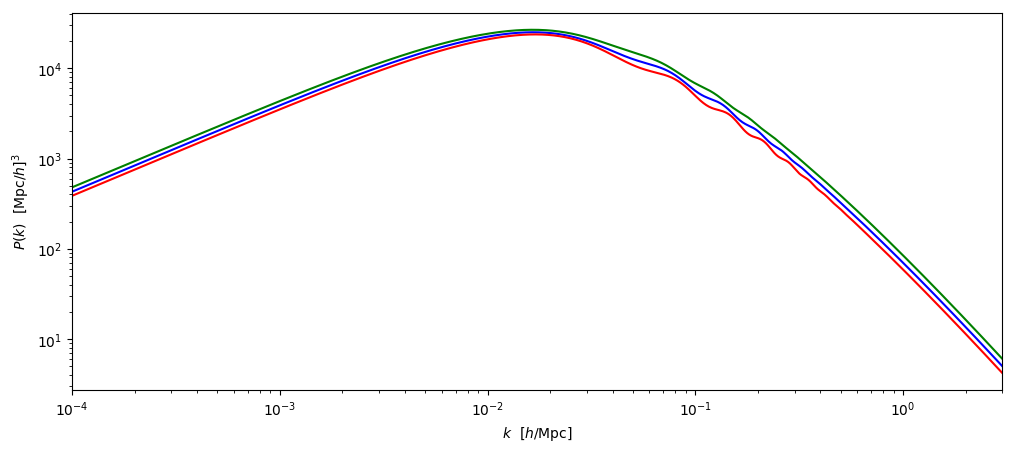

In [17]:
# Realizando o plot do espectro de potencia de cada modelo
plt.figure(2)
plt.figure(figsize=(12, 5), dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-') #LCDM
plt.plot(kk2,Pk2,'g-') # menos barions
plt.plot(kk3,Pk3,'r-') # mais barions

<Figure size 432x288 with 0 Axes>

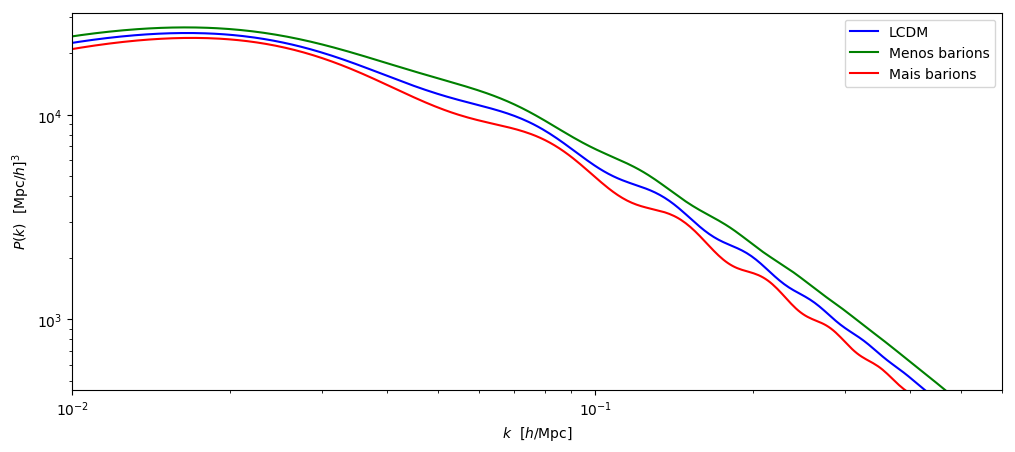

In [18]:
#Ampliando a área de interesse 
plt.figure(2)
plt.figure(figsize=(12, 5), dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(0.01,0.6)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.ylim(450,10**4.5)
plt.plot(kk,Pk,'b-',label='LCDM') #LCDM
plt.plot(kk2,Pk2,'g-',label='Menos barions') # menos barions
plt.plot(kk3,Pk3,'r-',label='Mais barions') # mais barions
plt.legend()

Observe que podemos observar uma alteração na forma do espectro de potência conforme modificamos a quantidade de matéria barionica. Aumentando a quantidade de bárions temos mais oscilações devido a maior competição entre a matéria e a radiação no periodo inicial do universo. E quando temos menos matéria bárions observarmos que as oscilações são menores, como uma menor competição entre matéria e radiação e o padrão "impresso" no universo é menos perceptivel. 

In [19]:
#apagando os modelos
LambdaCDM.empty()
LambdaCDM2.empty()
LambdaCDM3.empty()

In [20]:
#Observando como o parâmetro de Hubble interfere no Power Spectrum

# Iniciando as cosmologias 
LambdaCDM = Class()
LambdaCDM2 = Class()
LambdaCDM3 = Class()


#Fiducial H0= 67.8
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})


#Constante de Hubble menor H0 = 57.8 
LambdaCDM2.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.57810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM2.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})


#Constante de Hubble maior H0 = 77.8
LambdaCDM3.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.77810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM3.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# run class
LambdaCDM.compute()
LambdaCDM2.compute()
LambdaCDM3.compute()


In [21]:
# get P(k) at redhsift z=0
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk  = [] # P(k) in (Mpc/h)**3
h  = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

kk2 = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk2 = []
h2 = LambdaCDM2.h()
for k in kk:
    Pk2.append(LambdaCDM2.pk(k*h,0.)*h**3)
    
kk3 = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk3 = []
h3 = LambdaCDM3.h()
for k in kk:
    Pk3.append(LambdaCDM3.pk(k*h,0.)*h**3)

<Figure size 432x288 with 0 Axes>

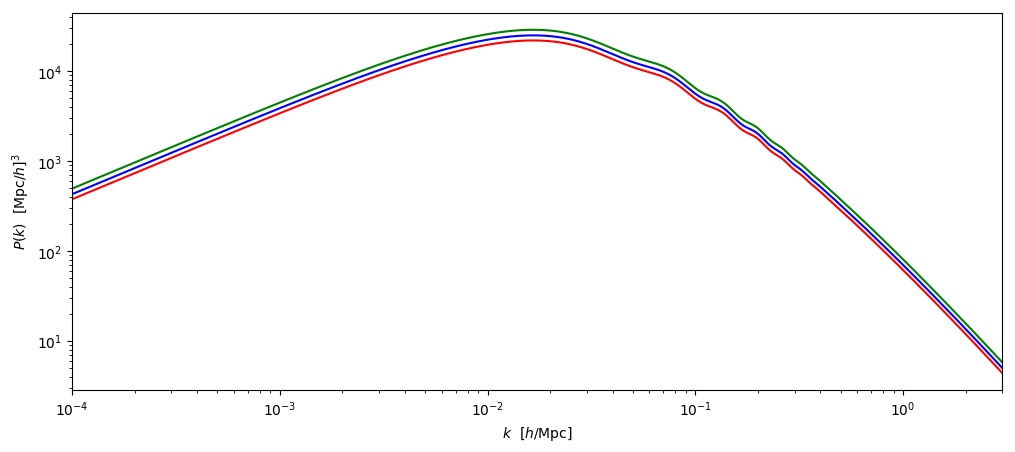

In [22]:
# plot P(k)
plt.figure(2)
plt.figure(figsize=(12, 5), dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-') #LCDM
plt.plot(kk2,Pk2,'g-') # Constante de Hubble menor
plt.plot(kk3,Pk3,'r-') # Constante de Hubble maior

<Figure size 432x288 with 0 Axes>

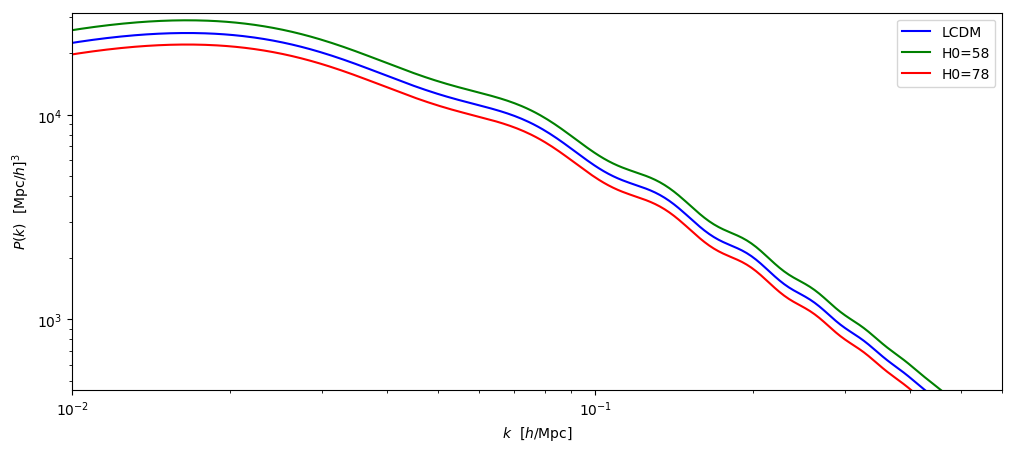

In [23]:
# plot P(k)
plt.figure(2)
plt.figure(figsize=(12, 5), dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(0.01,0.6)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.ylim(450,10**4.5)
plt.plot(kk,Pk,'b-',label='LCDM') #LCDM
plt.plot(kk2,Pk2,'g-',label='H0=58') # Constante de Hubble menor
plt.plot(kk3,Pk3,'r-',label='H0=78') # Constante de Hubble maior
plt.legend()

Observamos que alterar a taxa de expansão do universo não interfere de forma significativa nas oscilações. Porém, modifica a altura do espectro e outras modificações não perceptiveis de forma visual. 

In [24]:
#apagando os modelos
LambdaCDM.empty()
LambdaCDM2.empty()
LambdaCDM3.empty()

Essas mudanças no Power Spectrum são sentidas através do parâmetro $\sigma_{8}$ definido como,
$$
\sigma_{8}^{2} = \dfrac{1}{2\pi^{2}}\int W_{s}^{2}k^{2}P(k)dk
$$
onde $W_{s}$ é um filtro tophat de raio $8h^{-1}Mpc$ no espaço de Fourier 
$$
W_{s} = \dfrac{3j_{1}(kR_{8})}{kR_{8}}
$$
onde $j_{1}$ são funções de Bessel esférica de primeira ordem. 